In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from gensim.corpora.dictionary import Dictionary
from gensim.models.ldamodel import LdaModel
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
import nltk

In [7]:
# Download the stopwords data
nltk.download('stopwords')

# Load the data
data = pd.read_csv('/content/drive/MyDrive/Reviews.csv')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
# Preprocessing for Date-Time
data['Time'] = pd.to_datetime(data['Time'], unit='s')  # Convert Unix timestamp to datetime

# Assuming 'Sentiment' column has been created based on Score
data['Sentiment'] = np.where(data['Score'] >= 4, 'Positive', 'Negative')

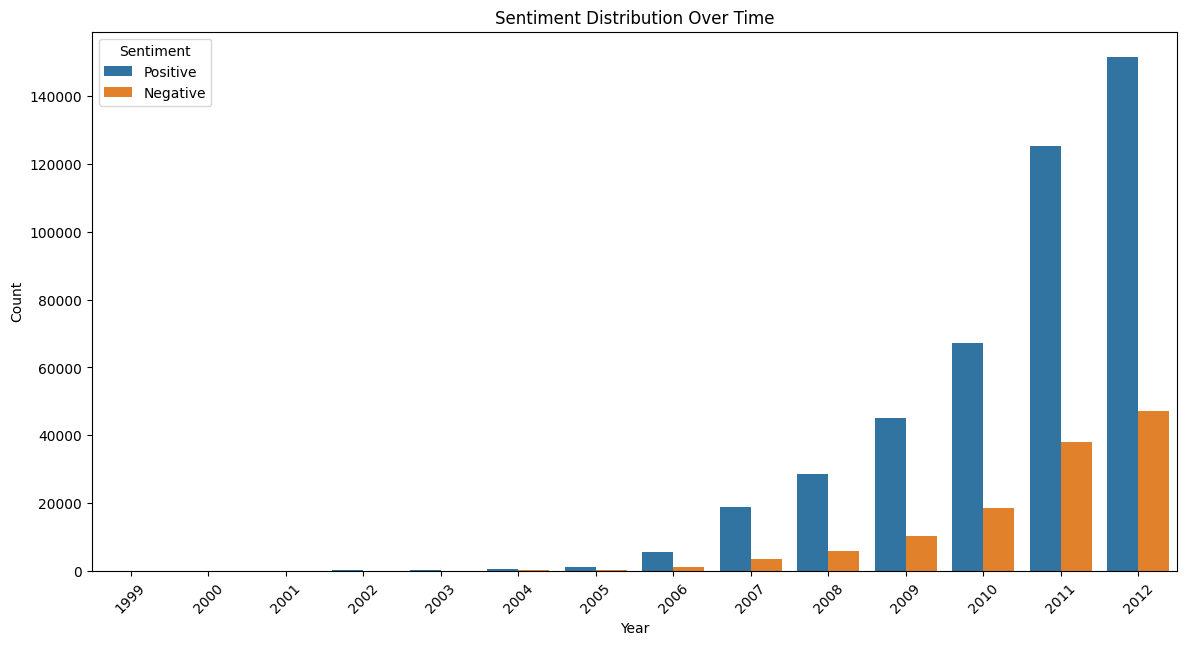

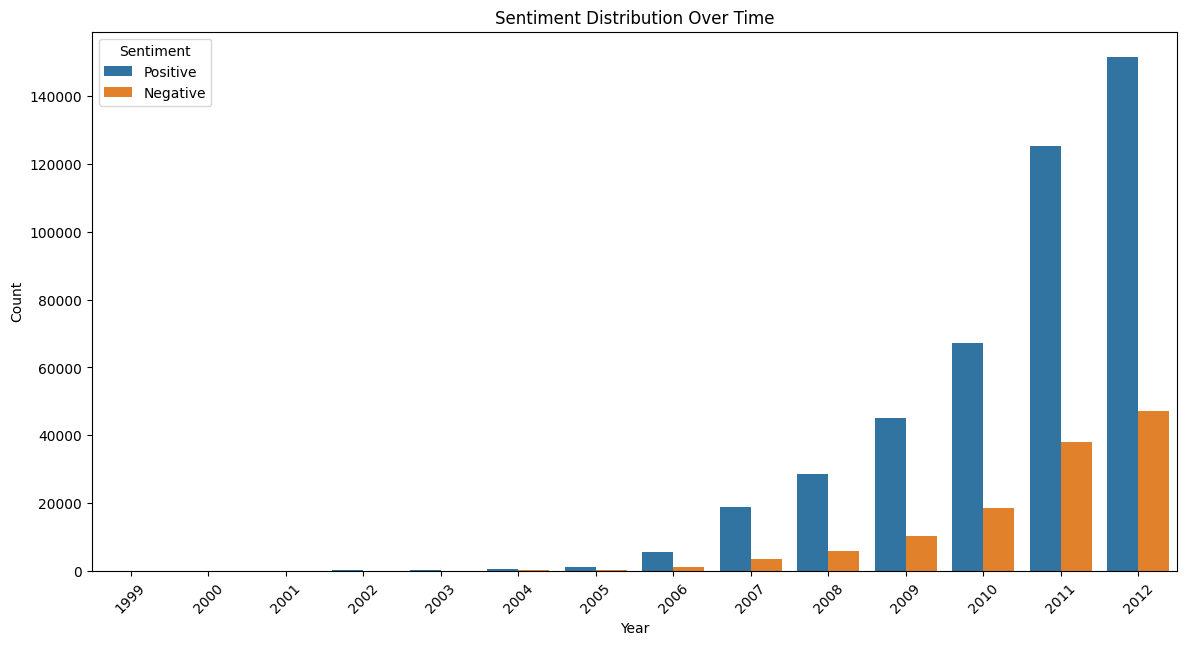

In [9]:
# 1. Sentiment Distribution Over Time
plt.figure(figsize=(14, 7))
sns.countplot(x=data['Time'].dt.year, hue=data['Sentiment'])
plt.title('Sentiment Distribution Over Time')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [10]:
import nltk

# Download the required NLTK data
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


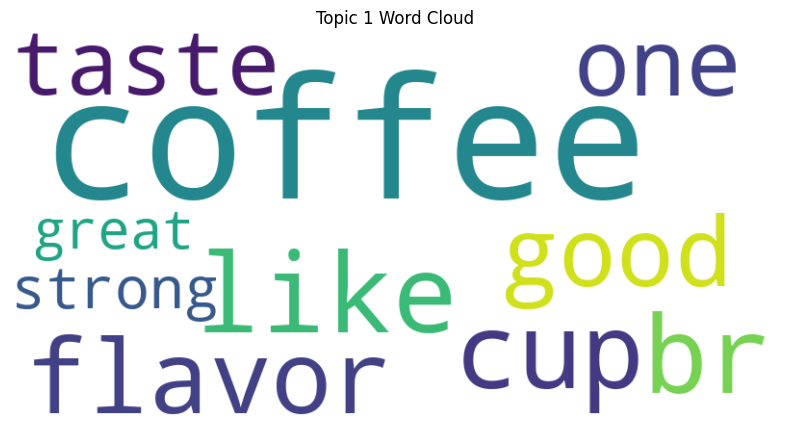

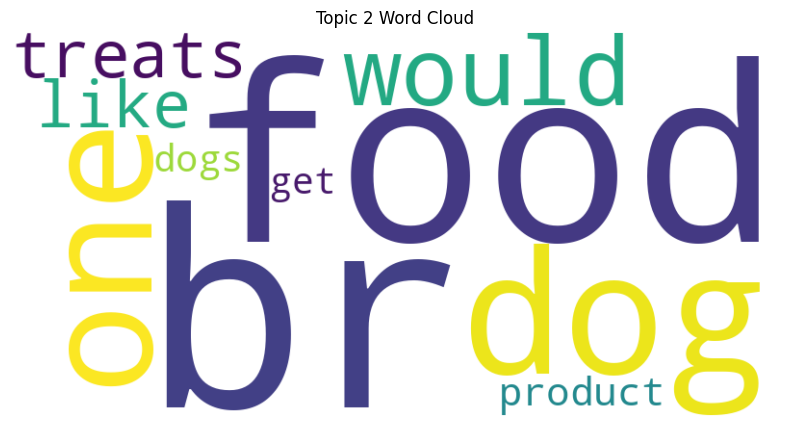

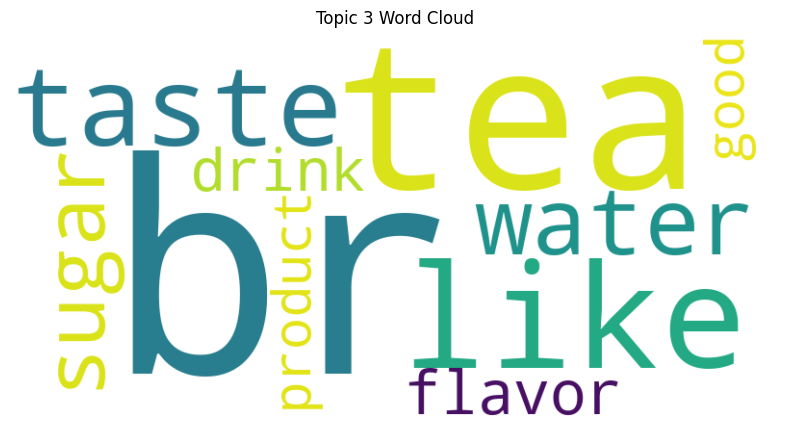

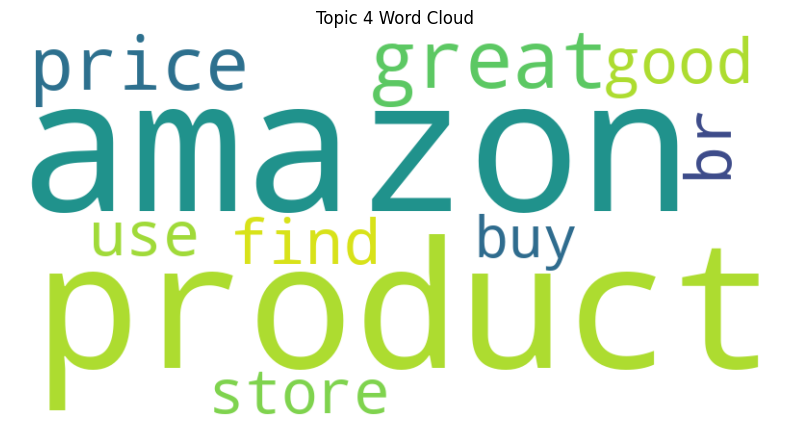

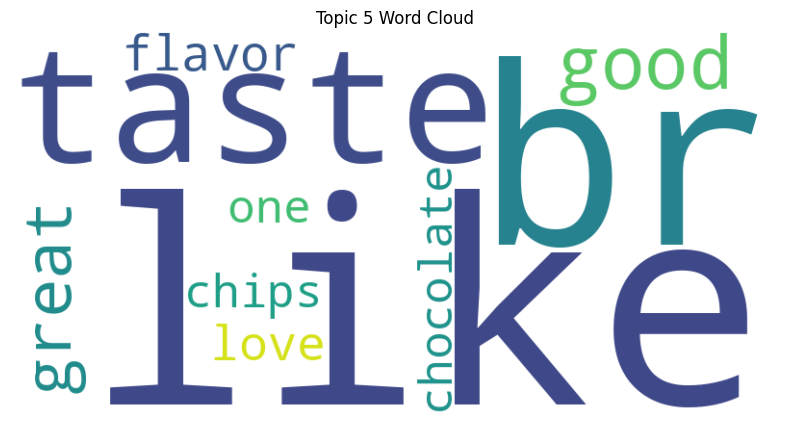

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


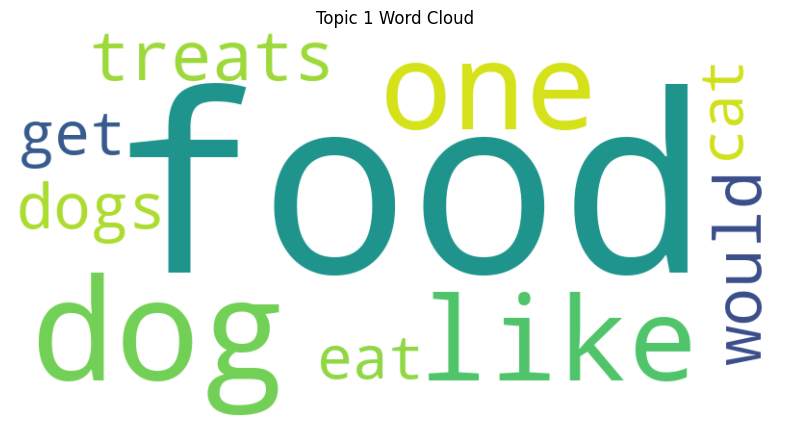

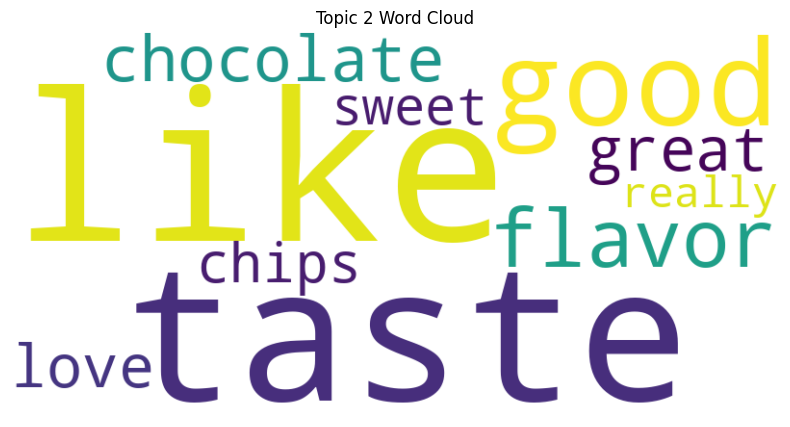

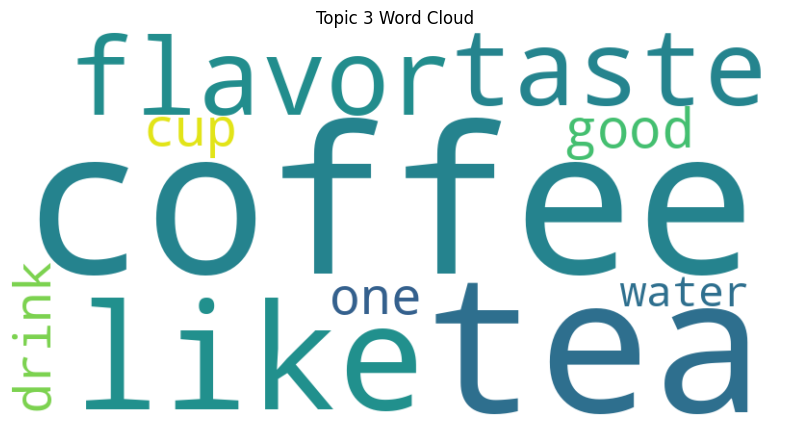

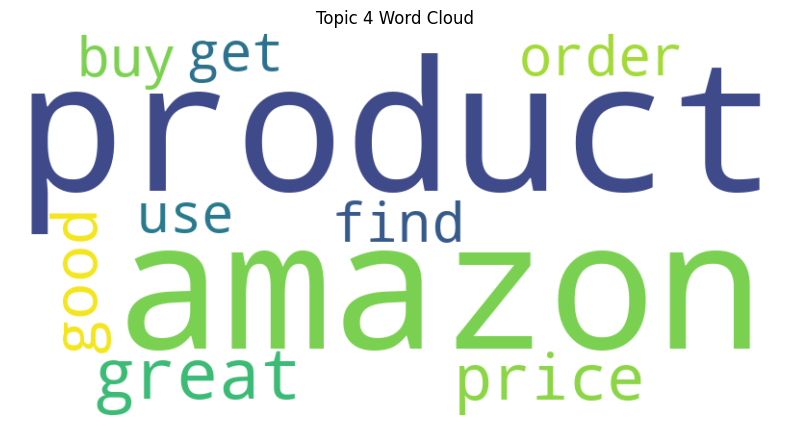

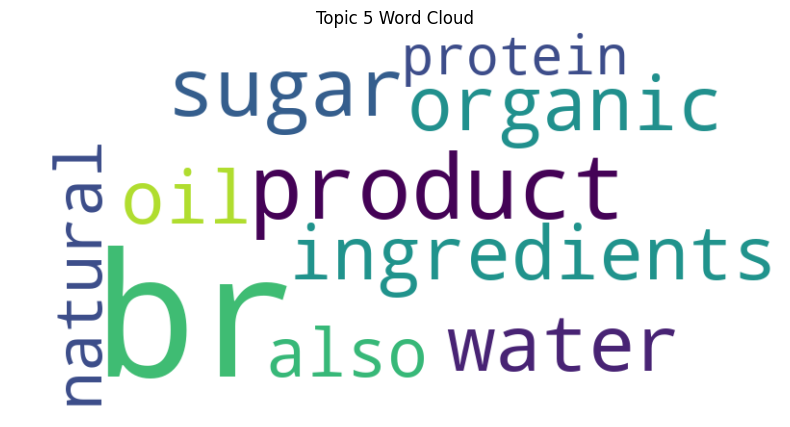

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from gensim.corpora.dictionary import Dictionary
from gensim.models.ldamodel import LdaModel
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

# Download necessary NLTK data
nltk.download('stopwords')
nltk.download('punkt')

# Load the data
data = pd.read_csv('/content/drive/MyDrive/Reviews.csv')

# Assuming there's a 'Text' column in the data
# Preprocessing for Date-Time
data['Time'] = pd.to_datetime(data['Time'], unit='s')  # Convert Unix timestamp to datetime

# Assuming 'Sentiment' column has been created based on Score
data['Sentiment'] = np.where(data['Score'] >= 4, 'Positive', 'Negative')

# Prepare text data for LDA
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Tokenize and remove stop words
    tokens = word_tokenize(text.lower())
    tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
    return tokens

# Apply text preprocessing
data['Tokens'] = data['Text'].apply(preprocess_text)

# Create a dictionary and corpus for LDA
dictionary = Dictionary(data['Tokens'])
corpus = [dictionary.doc2bow(text) for text in data['Tokens']]

# Train the LDA model
lda_model = LdaModel(corpus, num_topics=5, id2word=dictionary, passes=15)
topics = lda_model.show_topics(formatted=False)

# Word Clouds for Each Identified Topic
for i, topic in enumerate(topics):
    topic_words = dict(topic[1])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(topic_words)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Topic {i + 1} Word Cloud')
    plt.show()


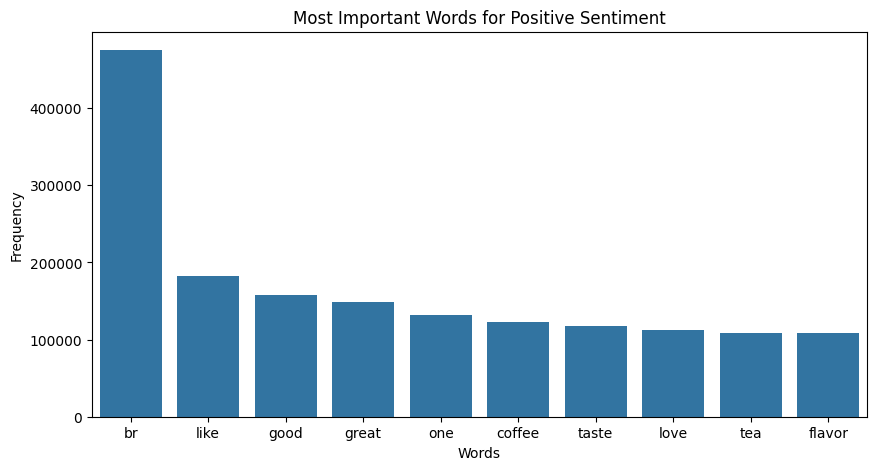

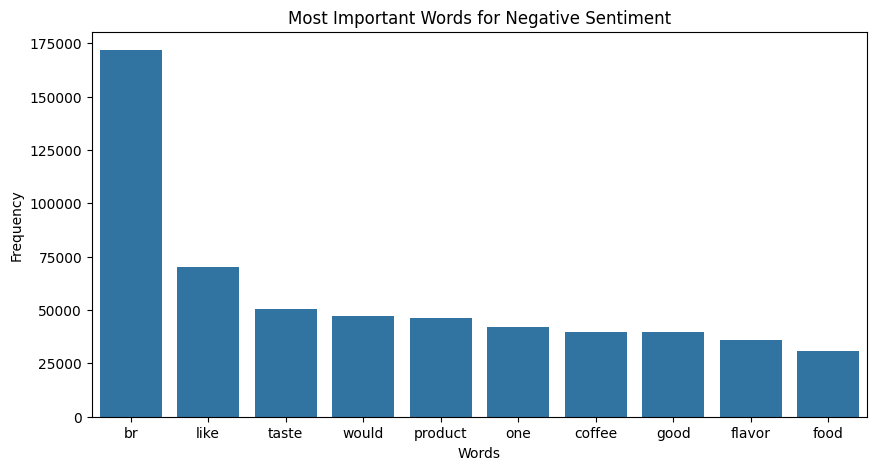

In [13]:
from collections import Counter

# Split tokens based on sentiment
positive_reviews = data[data['Sentiment'] == 'Positive']['Tokens']
negative_reviews = data[data['Sentiment'] == 'Negative']['Tokens']

# Flatten the list of tokens and count word frequencies
positive_word_counts = Counter([word for tokens in positive_reviews for word in tokens])
negative_word_counts = Counter([word for tokens in negative_reviews for word in tokens])

# Select the top words for visualization (adjust as needed)
top_positive_words = dict(positive_word_counts.most_common(10))
top_negative_words = dict(negative_word_counts.most_common(10))

# Plotting the bar charts with actual data
# Positive Words Bar Chart
plt.figure(figsize=(10, 5))
sns.barplot(x=list(top_positive_words.keys()), y=list(top_positive_words.values()))
plt.title('Most Important Words for Positive Sentiment')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()

# Negative Words Bar Chart
plt.figure(figsize=(10, 5))
sns.barplot(x=list(top_negative_words.keys()), y=list(top_negative_words.values()))
plt.title('Most Important Words for Negative Sentiment')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()


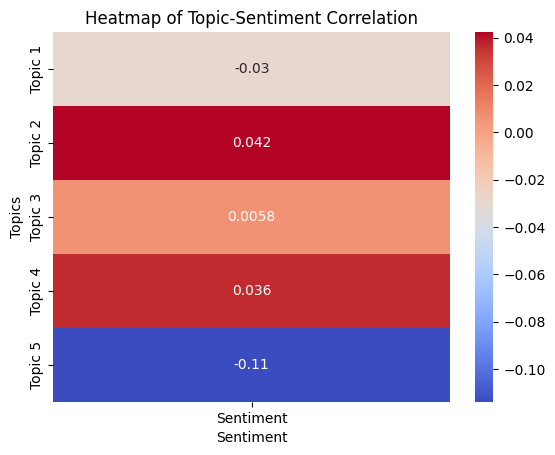

In [14]:
# Extract topic probabilities for each document
topic_distributions = [lda_model.get_document_topics(doc, minimum_probability=0) for doc in corpus]

# Convert to a DataFrame for easier manipulation
topic_matrix = np.array([[prob for _, prob in doc] for doc in topic_distributions])
topic_df = pd.DataFrame(topic_matrix, columns=[f'Topic {i+1}' for i in range(lda_model.num_topics)])

# Add sentiment labels to the topic DataFrame
topic_df['Sentiment'] = data['Sentiment'].map({'Positive': 1, 'Negative': 0})  # Convert sentiment to binary

# Calculate correlation between topics and sentiment
topic_sentiment_corr = topic_df.corr().loc[:, 'Sentiment'].iloc[:-1].values.reshape(-1, 1)

# Plot the heatmap of topic-sentiment correlation
sns.heatmap(topic_sentiment_corr, annot=True, cmap='coolwarm', xticklabels=['Sentiment'], yticklabels=[f'Topic {i+1}' for i in range(lda_model.num_topics)])
plt.title('Heatmap of Topic-Sentiment Correlation')
plt.xlabel('Sentiment')
plt.ylabel('Topics')
plt.show()
